In [1]:
!pip install arxiv

In [2]:
import arxiv
import pandas as pd

In [3]:
keyphrases = ['deepfake', 'deepfake?', '"deep-fake"', '"deep fake"', '"voice cloning"', '"voice conversion"', 'fake AND voice', '"image synthesis"', '"image generation" AND "face"', '"video forgery"', '"fake video"']
#keyphrases = []



#?? "video editing"
#?? "image inpainting"


In [4]:
from ast import literal_eval
from tqdm.notebook import tqdm

def do_search(keyphrase):
    
    search = arxiv.Search(
      query = keyphrase,
      #id_list: List[str] = [],
      max_results = 10000,
      sort_by = arxiv.SortCriterion.SubmittedDate,
      #sort_by: SortCriterion = SortCriterion.Relevanvce,
      sort_order = arxiv.SortOrder.Descending)
    
    return search

def parse_search_to_df(search):
    
    results = []
  
    for raw_result in tqdm(search.results()):
        parsed_result = {}
        parsed_result["published"] = raw_result.published
        parsed_result["url"] = raw_result.entry_id
        parsed_result["title"] = raw_result.title
        parsed_result["primary_category"] = raw_result.primary_category
        parsed_result["categories"] = raw_result.categories
        parsed_result["abstract"] = raw_result.summary
        results.append(parsed_result)
    
    local_result_df = pd.DataFrame(results)
    if results:
        local_result_df["published"] = pd.to_datetime(local_result_df["published"])
        local_result_df.set_index("published", inplace=True)
        local_result_df["categories"] = local_result_df["categories"].astype(str)
    
    return local_result_df

def do_keyphrase_list(keyphrases):
    
    for keyphrase in tqdm(keyphrases):
        if "local_result_df" in locals():
            tmp_df = parse_search_to_df(do_search(keyphrase))
            local_result_df = pd.concat([local_result_df,tmp_df])#, ignore_index=True)
            local_result_df.drop_duplicates(inplace=True)
        else:
            local_result_df = parse_search_to_df(do_search(keyphrase))

    local_result_df["categories"] = local_result_df["categories"].apply(lambda x: literal_eval(str(x)))
    return local_result_df

result_df = do_keyphrase_list(keyphrases)
result_df




  0%|          | 0/11 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

url  \
published                                                      
2022-10-03 14:20:01+00:00  http://arxiv.org/abs/2210.00957v1   
2022-10-01 20:37:24+00:00  http://arxiv.org/abs/2210.00361v1   
2022-09-28 13:46:29+00:00  http://arxiv.org/abs/2209.14098v1   
2022-09-28 02:46:04+00:00  http://arxiv.org/abs/2209.13792v1   
2022-09-27 10:15:46+00:00  http://arxiv.org/abs/2209.13289v1   
...                                                      ...   
2020-01-09 14:37:17+00:00  http://arxiv.org/abs/2001.03024v2   
2019-06-21 18:29:57+00:00  http://arxiv.org/abs/1906.09288v1   
2019-01-25 07:09:14+00:00  http://arxiv.org/abs/1901.08759v1   
2018-03-26 19:25:02+00:00  http://arxiv.org/abs/1803.09803v2   
2018-03-24 23:12:44+00:00  http://arxiv.org/abs/1803.09179v1   

                                                                       title  \
published                                                                      
2022-10-03 14:20:01+00:00  UnGANable: Defending Against GAN-based Face Ma...   
2022-10-01 20:37:24+00:00  Evaluation of Pre-Trained CNN Models for Geogr...   
2022-09-28 13:46:29+00:00   Deepfake audio detection by speaker verification   
2022-09-28 02:46:04+00:00  A Machine Learning Approach for DeepFake Detec...   
2022-09-27 10:15:46+00:00  When Handcrafted Features and Deep Features Me...   
...                                                                      ...   
2020-01-09 14:37:17+00:00  DeeperForensics-1.0: A Large-Scale Dataset for...   
2019-06-21 18:29:57+00:00  Hiding Faces in Plain Sight: Disrupting AI Fac...   
2019-01-25 07:09:14+00:00           Misleading Metadata Detection on YouTube   
2018-03-26 19:25:02+00:00      Generating Talking Face Landmarks from Speech   
2018-03-24 23:12:44+00:00  FaceForensics: A Large-scale Video Dataset for...   

                          primary_category               categories  \
published                                                             
2022-10-03 14:20:01+00:00            cs.CR    [cs.CR, cs.CV, cs.LG]   
2022-10-01 20:37:24+00:00            cs.CV                  [cs.CV]   
2022-09-28 13:46:29+00:00            cs.SD  [cs.SD, cs.CV, eess.AS]   
2022-09-28 02:46:04+00:00            cs.CV    [cs.CV, I.4.7; I.5.0]   
2022-09-27 10:15:46+00:00            cs.CV           [cs.CV, cs.LG]   
...                                    ...                      ...   
2020-01-09 14:37:17+00:00            cs.CV           [cs.CV, cs.LG]   
2019-06-21 18:29:57+00:00            cs.CV                  [cs.CV]   
2019-01-25 07:09:14+00:00            cs.CL  [cs.CL, cs.CV, eess.IV]   
2018-03-26 19:25:02+00:00            cs.CV                  [cs.CV]   
2018-03-24 23:12:44+00:00            cs.CV                  [cs.CV]   

                                                                    abstract  
published                                                                     
2022-10-03 14:20:01+00:00  Deepfakes pose severe threats of visual misinf...  
2022-10-01 20:37:24+00:00  Thanks to the remarkable advances in generativ...  
2022-09-28 13:46:29+00:00  Thanks to recent advances in deep learning, so...  
2022-09-28 02:46:04+00:00  With the spread of DeepFake techniques, this t...  
2022-09-27 10:15:46+00:00  The accelerated growth in synthetic visual med...  
...                                                                      ...  
2020-01-09 14:37:17+00:00  We present our on-going effort of constructing...  
2019-06-21 18:29:57+00:00  Recent years have seen fast development in syn...  
2019-01-25 07:09:14+00:00  YouTube is the leading social media platform f...  
2018-03-26 19:25:02+00:00  The presence of a corresponding talking face h...  
2018-03-24 23:12:44+00:00  With recent advances in computer vision and gr...  

[1645 rows x 5 columns]

In [5]:
print(result_df.sort_index().head(1).title.values)

["Secondary Image Synthesis In Electronic Computer Photography (Vtorichnyj Sintez Izobrazhenij V Elektronnoj Komp'Yuternoj Fotografii)"]


In [6]:
print("Total number of papers",len(result_df))

Total number of papers 1645


In [7]:
len(result_df.primary_category.value_counts().index.unique())

35

In [8]:
result_df.index.min()

Timestamp('1994-09-08 10:01:48+0000', tz='UTC')

In [11]:
result_df.index.max()

Timestamp('2022-10-03 14:56:05+0000', tz='UTC')

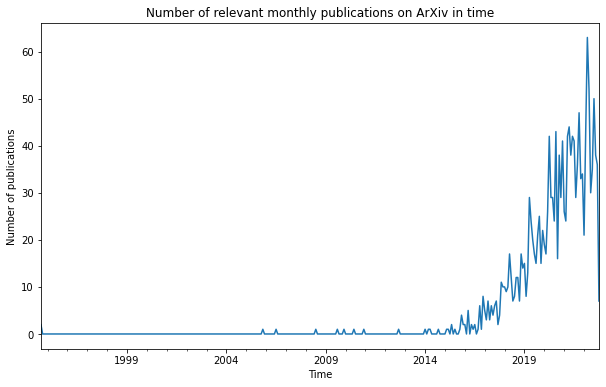

In [12]:
import matplotlib.pyplot as plt

ax = result_df["url"].resample("MS").count().plot()
ax.set_title("Number of relevant monthly publications on ArXiv in time")
ax.set_xlabel("Time")
ax.set_ylabel("Number of publications")
plt.gcf().set_size_inches(10, 6)

plt.show()

[Timestamp('2018-04-01 00:00:00+0000', tz='UTC', freq='MS'), 17]
[Timestamp('2019-04-01 00:00:00+0000', tz='UTC', freq='MS'), 29]
[Timestamp('2020-04-01 00:00:00+0000', tz='UTC', freq='MS'), 42]
[Timestamp('2021-10-01 00:00:00+0000', tz='UTC', freq='MS'), 47]
[Timestamp('2022-03-01 00:00:00+0000', tz='UTC', freq='MS'), 63]


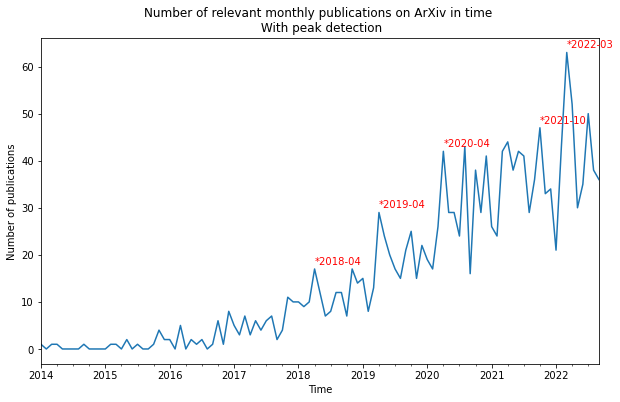

In [22]:
import peakdetect
import matplotlib.pyplot as plt

resampled_df = result_df[result_df.index.to_series().gt("2014") & result_df.index.to_series().lt("2022-10")]["url"].resample("MS").count()
arxiv_peaks = peakdetect.peakdetect(resampled_df, resampled_df.index, lookahead=3, delta=7)

ax = resampled_df.plot()

locs, labels = plt.xticks()

for peak in arxiv_peaks[0]:
    print(peak)
    ax.annotate("*"+str(peak[0])[:7],xy=(peak[0],peak[1]+1), fontsize=10, color="red")
    
ax.set_title("Number of relevant monthly publications on ArXiv in time \n With peak detection")
ax.set_xlabel("Time")
ax.set_ylabel("Number of publications")
plt.gcf().set_size_inches(10, 6)

plt.show()


/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


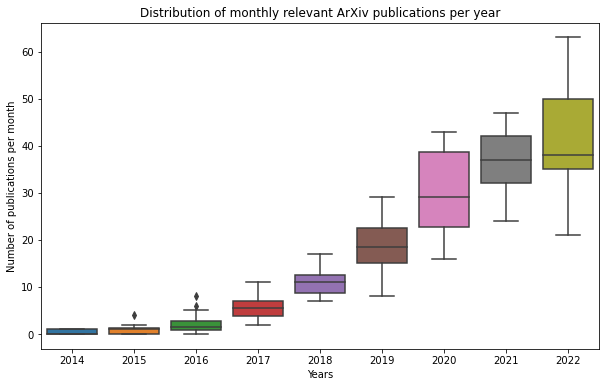

In [31]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(resampled_df.index.year, resampled_df, ax=ax)
plt.title("Distribution of monthly relevant ArXiv publications per year")
ax.set_xlabel("Years")
ax.set_ylabel("Number of publications per month")

plt.show()

In [14]:
len(result_df[result_df.index.to_series().gt("2014")]["url"].resample("MS"))

106

In [15]:
result_df.resample("MS").count().to_csv("arxiv_publications.csv")

In [16]:
#filter categories

In [17]:
result_df.primary_category.value_counts()

cs.CV                934
eess.AS              204
cs.SD                160
eess.IV               89
cs.LG                 80
cs.CR                 37
cs.CL                 23
cs.GR                 22
stat.ML               16
cs.CY                 11
cs.HC                  9
cs.MM                  8
physics.med-ph         8
astro-ph.IM            6
cs.SI                  4
cs.NI                  3
cs.RO                  3
cs.NE                  3
astro-ph               2
astro-ph.SR            2
q-bio.NC               2
astro-ph.GA            2
astro-ph.CO            2
astro-ph.EP            2
cs.AI                  2
adap-org               2
cs.IR                  1
cs.SE                  1
stat.ME                1
physics.soc-ph         1
q-bio.BM               1
math.ST                1
physics.geo-ph         1
cond-mat.mtrl-sci      1
cs.ET                  1
Name: primary_category, dtype: int64

In [18]:
for abst in result_df["abstract"]:
    print(abst,"\n\n")

Deepfakes pose severe threats of visual misinformation to our society. One
representative deepfake application is face manipulation that modifies a
victim's facial attributes in an image, e.g., changing her age or hair color.
The state-of-the-art face manipulation techniques rely on Generative
Adversarial Networks (GANs). In this paper, we propose the first defense
system, namely UnGANable, against GAN-inversion-based face manipulation. In
specific, UnGANable focuses on defending GAN inversion, an essential step for
face manipulation. Its core technique is to search for alternative images
(called cloaked images) around the original images (called target images) in
image space. When posted online, these cloaked images can jeopardize the GAN
inversion process. We consider two state-of-the-art inversion techniques
including optimization-based inversion and hybrid inversion, and design five
different defenses under five scenarios depending on the defender's background
knowledge. Extensive 


Generative deep learning algorithms have progressed to a point where it is
difficult to tell the difference between what is real and what is fake. In
2018, it was discovered how easy it is to use this technology for unethical and
malicious applications, such as the spread of misinformation, impersonation of
political leaders, and the defamation of innocent individuals. Since then,
these `deepfakes' have advanced significantly.
  In this paper, we explore the creation and detection of deepfakes and provide
an in-depth view of how these architectures work. The purpose of this survey is
to provide the reader with a deeper understanding of (1) how deepfakes are
created and detected, (2) the current trends and advancements in this domain,
(3) the shortcomings of the current defense solutions, and (4) the areas which
require further research and attention. 


The Deepfake phenomenon has become very popular nowadays thanks to the
possibility to create incredibly realistic images using deep l

We present Generative Adversarial Networks (GANs), in which the symmetric
property of the generated images is controlled. This is obtained through the
generator network's architecture, while the training procedure and the loss
remain the same. The symmetric GANs are applied to face image synthesis in
order to generate novel faces with a varying amount of symmetry. We also
present an unsupervised face rotation capability, which is based on the novel
notion of one-shot fine tuning. 


Learning disentangled representation of data without supervision is an
important step towards improving the interpretability of generative models.
Despite recent advances in disentangled representation learning, existing
approaches often suffer from the trade-off between representation learning and
generation performance i.e. improving generation quality sacrifices
disentanglement performance). We propose an Information-Distillation Generative
Adversarial Network (ID-GAN), a simple yet generic framework tha

between the generator and the discriminator. 


Flow-based generative models show great potential in image synthesis due to
its reversible pipeline and exact log-likelihood target, yet it suffers from
weak ability for conditional image synthesis, especially for multi-label or
unaware conditions. This is because the potential distribution of image
conditions is hard to measure precisely from its latent variable $z$. In this
paper, based on modeling a joint probabilistic density of an image and its
conditions, we propose a novel flow-based generative model named conditional
adversarial generative flow (CAGlow). Instead of disentangling attributes from
latent space, we blaze a new trail for learning an encoder to estimate the
mapping from condition space to latent space in an adversarial manner. Given a
specific condition $c$, CAGlow can encode it to a sampled $z$, and then enable
robust conditional image synthesis in complex situations like combining person
identity with multiple attribu

In [19]:
for abst in result_df[result_df.primary_category=="eess.IV"]["abstract"]:
    print(abst,"\n\n")

An optical microscopic examination of thinly cut stained tissue on glass
slides prepared from a FFPE tissue blocks is the gold standard for tissue
diagnostics. In addition, the diagnostic abilities and expertise of any
pathologist is dependent on their direct experience with common as well as
rarer variant morphologies. Recently, deep learning approaches have been used
to successfully show a high level of accuracy for such tasks. However,
obtaining expert-level annotated images is an expensive and time-consuming task
and artificially synthesized histological images can prove greatly beneficial.
Here, we present an approach to not only generate histological images that
reproduce the diagnostic morphologic features of common disease but also
provide a user ability to generate new and rare morphologies. Our approach
involves developing a generative adversarial network model that synthesizes
pathology images constrained by class labels. We investigated the ability of
this framework in synt

In [20]:
#arima

- "deepfake"
- '"deep fake"'
- '"fake video"'
- '"video forgery"'
- '"image generation" "face"'

?? "video editing"
?? "image inpainting"

ARXIV time bias!!!!!


Arxiv: image synthesis kulcsszó CS-re szűrve jó lehet!

" használata harmadolja a találatokat


https://arxiv.org/search/advanced?advanced=&terms-0-operator=AND&terms-0-term=image+synthesis&terms-0-field=all&classification-computer_science=y&classification-physics_archives=all&classification-include_cross_list=include&date-filter_by=all_dates&date-year=&date-from_date=&date-to_date=&date-date_type=submitted_date&abstracts=show&size=50&order=-announced_date_first



#!pip install pmdarima
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

publish_df = pd.to_datetime(publish_dates).to_frame().resample("MS").count()

#publish_df = publish_df[publish_df.index.year >= 2016]


model = auto_arima(publish_df, start_p=0, start_q=0)
#model.fit(df)

def forecast_to_df(model, steps=10):
    forecast, conf_int = model.predict(n_periods=steps, return_conf_int=True)
    pred_df=pd.DataFrame()
    pred_df["lower"] = conf_int[:,0]
    pred_df["upper"] = conf_int[:,1]
    pred_df["pred"] = forecast.values
    return pred_df

STEPS = 60

pred_df = forecast_to_df(model, steps=STEPS)

print(model)
print(publish_df.index[-1])

pred_df.set_index(pd.date_range(start=publish_df.index[-1],periods=STEPS, freq="MS"), inplace=True)
fig, ax = plt.subplots(figsize=(22,7))
ax.plot(publish_df[publish_df.index.year >= 2016],label='Monthly publication frequencies')
ax.plot(pred_df, label=['Lower dound',"Upper bound",'Projection mean'])
ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
ax.legend()
plt.plot()